<a href="https://colab.research.google.com/github/ArSin2002/data_sciences/blob/main/image_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt


In [6]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 13s 0us/step


(50000, 32, 32, 3)

In [7]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

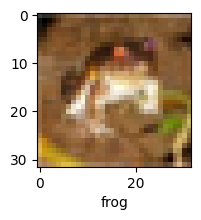

In [10]:
plot_sample(x_train,y_train,0)

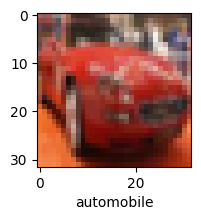

In [11]:
plot_sample(x_train,y_train,5)

In [12]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 11s 6ms/step - loss: 32.9695 - accuracy: 0.1204
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3051 - accuracy: 0.0979
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3174 - accuracy: 0.0998
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3032 - accuracy: 0.0992
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3027 - accuracy: 0.0993


In [13]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 2.3029 - accuracy: 0.0998


[2.302938222885132, 0.0997999981045723]

In [19]:
cnn=models.Sequential([
    # cnn
    layers.Conv2D(filters=32 , kernel_size =(3,3) , activation='relu',input_shape=(32,32,3) ),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64 , kernel_size =(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [20]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [21]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 4ms/step - loss: 1.7838 - accuracy: 0.4039
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2852 - accuracy: 0.5389
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1439 - accuracy: 0.5936
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0439 - accuracy: 0.6337
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9758 - accuracy: 0.6602
Epoch 6/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.9148 - accuracy: 0.6820
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8731 - accuracy: 0.6971
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8258 - accuracy: 0.7136
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7901 - accuracy: 0.7258
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.75

In [22]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1470 - accuracy: 0.6422


[1.1470389366149902, 0.6421999931335449]

In [23]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [24]:
y_pred=cnn.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [25]:
y_classes = [np.argmax(e) for e in y_pred]
y_classes

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 5,
 9,
 4,
 9,
 6,
 7,
 9,
 8,
 5,
 3,
 8,
 6,
 7,
 0,
 4,
 9,
 4,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 6,
 9,
 6,
 7,
 9,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 7,
 4,
 2,
 9,
 8,
 6,
 3,
 8,
 8,
 4,
 5,
 2,
 6,
 7,
 5,
 6,
 3,
 6,
 2,
 1,
 2,
 5,
 7,
 4,
 6,
 8,
 8,
 9,
 2,
 7,
 6,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 2,
 4,
 9,
 9,
 0,
 2,
 8,
 6,
 4,
 6,
 6,
 0,
 2,
 7,
 4,
 7,
 6,
 3,
 1,
 1,
 3,
 6,
 3,
 7,
 7,
 2,
 2,
 3,
 9,
 3,
 0,
 4,
 3,
 5,
 8,
 5,
 1,
 2,
 8,
 6,
 4,
 3,
 3,
 2,
 4,
 5,
 9,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 4,
 5,
 6,
 5,
 8,
 4,
 6,
 6,
 3,
 5,
 6,
 3,
 6,
 0,
 0,
 5,
 5,
 9,
 6,
 4,
 2,
 1,
 6,
 2,
 0,
 7,
 8,
 7,
 9,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 5,
 7,
 5,
 9,
 0,
 5,
 2,
 3,
 3,
 8,
 6,
 2,
 6,
 8,
 5,
 3,
 3,
 7,
 9,
 4,
 3,
 2,
 2,
 8,
 3,
 9,
 8,
 7,
 1,
 3,
 4,
 5,
 7,
 9,
 6,
 9,
 5,
 7,
 2,
 3,
 7,
 9,
 8,
 4,
 7,
 3,
 9,
 3,
 4,
 9,
 4,
 2,
 4,
 6,
 5,
 1,
 5,
 1,
 8,
 0,
 4,
 9,
 5,
 5,
 1,
 9,
 1,
 9,
 0,
 2,
 9,
 4,
 4,
 2,


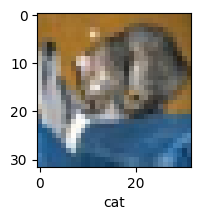

In [26]:
plot_sample(x_test,y_test,0)

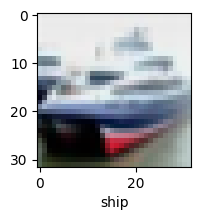

In [27]:
plot_sample(x_test,y_test,1)